# Homework 2: U.S. Boundary Currents

Name: Nathan Johnson

Date: 9/2/2024

#### Overview
In class, we examined the general structure of ocean circulation on large scales and found that major ocean basins contain gyres - large circulation cells in the ocean. Further, we saw that vertical motion is driven by changes in density. In this homework, you will examine the structure of the ocean currents along the east and west coasts of the U.S and consider how these currents fit into the broader ocean circulation.

#### Import Modules
To begin, import the modules required to access data from netCDF files and make plots:

In [5]:
# import modules here
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import xarray as xr

### Part 1: Horizonal Velocity Structure
First, examine the mean velocity on the west and east coasts of the U.S. Begin by loading in both the `EVEL` and `NVEL` fields from the `EVEL_2015_12.nc` and `VVEL_2015_12.nc` files, respectively -- these fields represent the zonal (eastward-flowing) and meridional (westward-flowing) velocity in the model. 

In [6]:
# read in the EVEL and VVEL files to an xarray dataset
# note that these files must be in the same folder as this notebook
ds_east = xr.open_dataset('EVEL_2015_12.nc')
ds_north = xr.open_dataset('NVEL_2015_12.nc')

In [7]:
# store the velocity components and longitude/latitude data
# into numpy arrays
evel = np.array(ds_east['EVEL'])
nvel = np.array(ds_north['NVEL'])
lon = np.array(ds_east['longitude'])
lat = np.array(ds_east['latitude'])

Now that you have the data read in, make a plot of the eastward and northward velocity at the surface of the ocean. Be sure to add a title to each plot and some labels for the x and y axes.

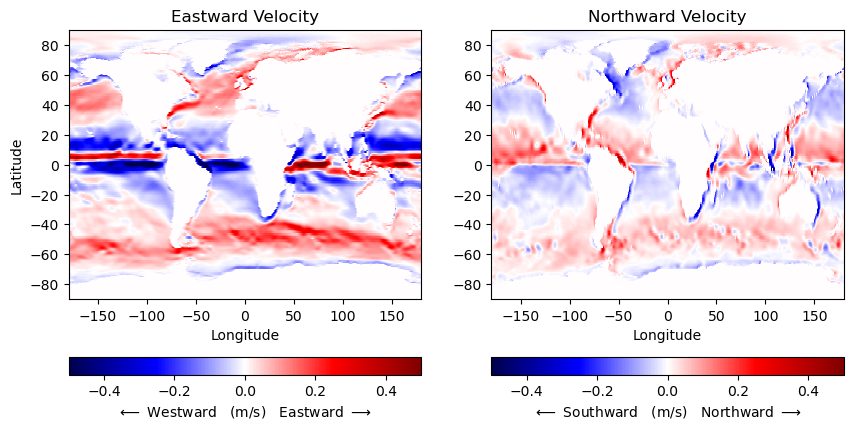

In [9]:
# make a plot of the velocity components (one for each)
# use a divergent colormap (such as seismic) to visualize the data
# for interpretation, it will likely be helpful to adjust the data
# bounds to be +/- 0.5 or even +/- 0.1

# make a figure
fig = plt.figure(figsize=(10,5))

# make a subplot for the eastward velocity at the surface
plt.subplot(1,2,1)
C = plt.pcolormesh(lon,lat,evel[0, 0, :, :], vmin = -0.5, vmax=0.5, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='$\longleftarrow$ Westward   (m/s)   Eastward $\longrightarrow$' )
plt.title('Eastward Velocity')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

# make a subplot for the northward velocity at the surface
plt.subplot(1,2,2)
C = plt.pcolormesh(lon,lat,nvel[0, 0, :, :], vmin = -0.5, vmax=0.5, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='$\longleftarrow$ Southward   (m/s)   Northward $\longrightarrow$' )
plt.xlabel('Longitude')
plt.title('Northward Velocity');


### Questions:
1. What direction are the surface currents moving (roughly) at:
    - 30$^{\circ}$N on the east cost of the U.S.? the west coast?
    - 45$^{\circ}$N on the east cost of the U.S.? the west coast?
2. Which current flows faster? East coast or west coast?
2. Explain how these currents are part of the gyres in the North Atlantic and North Pacific.

# change this cell to a markdown and input your response here

1.  a. The surface currents at 30 degrees are going westward and southward on the west coast and are going westward and northward on the east coast.
    b. The surface currents at 45 degrees are going eastward and northward on the west coast and are going eastward and southward on the east coast.
2. The East coast flows much faster in the northeast direction
3. On the east coast the surface currents are part of the North Atlantic gyre, where the currents go northwest at the 30 degree then southeast at the 45 degree. On the West coast the currents are part of the North Pacific gyre, where currents go from southeast at the 30 degree latitude then go northwest at the 45 degree.

### Part 2: Horizonal Temperature Structure
Next, examine the mean temperature on the coasts of the U.S. Load in the temperature field `THETA` from the `THETA_2015_12.nc` file. 

In [11]:
# read in the THETA file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_theta = xr.open_dataset('THETA_2015_12.nc')

In [13]:
# store the THETA grid into a into numpy array
THETA = ds_theta['THETA'][:]

Similar to your plot above, make a plot of the temperature at the surface of the ocean. 

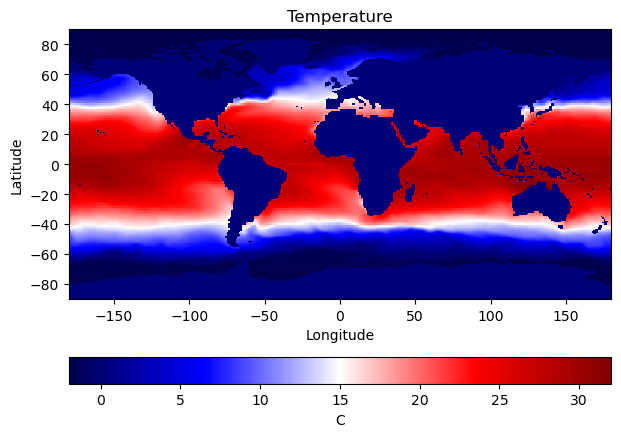

In [16]:
# make a plot of the temperature
# set the data bounds to -2 to 32 with a 
# sensible color map to visualize the data

# make a figure
fig = plt.figure(figsize=(7,5))

# plot the data
C = plt.pcolormesh(lon,lat,THETA[0, 0, :, :], vmin = -2, vmax=32, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='C' ) # bc water is salty, water can get below freezing!
plt.title('Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


### Questions:
1. How does the temperature on the west cost of the U.S. compare to the east coast at the same latitude?
2. How might ocean currents contribute to this temperature regime?

# change this cell to a markdown and input your response here

1. At the 30 degree latitude, the temp on the west coast is about 15 degrees C while at the same latitude on the east coast the temp is closer to 25 degrees C.
2. Ocean currents contribute to this temp difference because on the east, surface currents are moving north, bringing warm water from the equator while on the west coast cold water is being brought down from the colder north by a southward current.

### Part 3: Vertical Structure
Next, look at the vertical structure of ocean currents as well as temperature on the U.S coast. Being by loading in the vertical velocity field `WVELSTAR` from the `WVELSTAR_2015_12.nc` file. This variable estimates the speed at which water is moving in the vertical direction.

In [17]:
# read in the WVELSTAR file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_wvelstar = xr.open_dataset('WVELSTAR_2015_12.nc')

In [18]:
ds_wvelstar

<xarray.Dataset>
Dimensions:    (i: 720, j: 360, k_l: 50, time: 1, nv: 2)
Coordinates:
  * i          (i) int64 0 1 2 3 4 5 6 7 8 ... 712 713 714 715 716 717 718 719
  * j          (j) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * k_l        (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * time       (time) datetime64[ns] 2015-12-16T12:00:00
    latitude   (j) float64 ...
    longitude  (i) float64 ...
    timestep   (time) int64 ...
    Zl         (k_l) float32 ...
    time_bnds  (time, nv) datetime64[ns] ...
Dimensions without coordinates: nv
Data variables:
    WVELSTAR   (time, k_l, j, i) float64 ...
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 4
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    ...                           ...
    nz:                           50
    geospatial_vertical_units:    meter
    geospatial_vertical_max:      0.0
    date_created:                 Tue Aug 27 18:20:19 2019
    time_coverage_start:          2015-12-01T00:00:00
    time_coverage_end:            2016-01-01T00:00:00

In [43]:
# store the WVELSTAR grid into a into numpy array
WVELSTAR = np.array(ds_wvelstar['WVELSTAR'])

Since we'll be plotting a vertical profile, we'll also need a depth variable. Read this variable into a numpy array in the same way you read in the data above.

In [44]:
# read in the depth variable to a numpy array
# Hint: Look at the metadata for the WVELSTAR
# What is the name of the depth variable?
Zl = np.array(ds_wvelstar['Zl'])

Next, create side-by-side plots of vertical velocity and temperature along the row corresponding to the latitude 40$^{\circ}$N i.e. index 259 along the latitude axis.

Text(0.5, 0, 'Longitude')

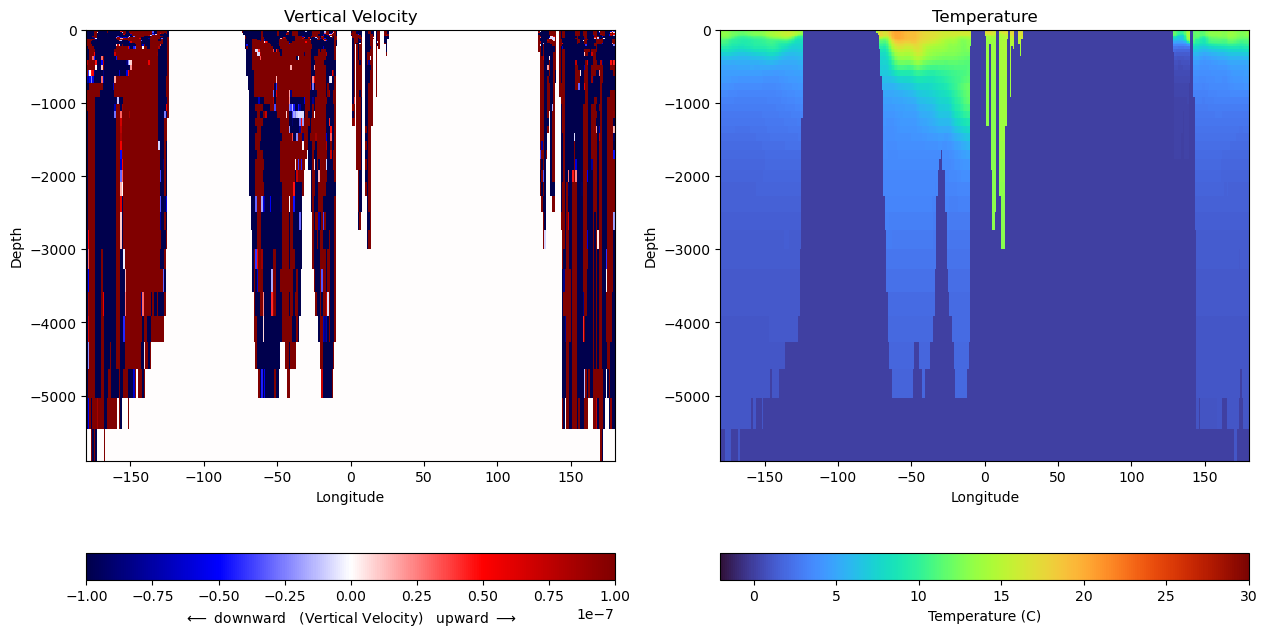

In [69]:
# make a figure
fig = plt.figure(figsize=(15,8))

# make subplot the vertical velocity
# use a divergent colorbar
# you will need to adjust the color bounds appropriately for this data
# try a few values and see what works
plt.subplot(1,2,1)
C = plt.pcolormesh(lon,Zl,WVELSTAR[0, :, 259, :], vmin = -0.0000001 , vmax=0.0000001 , cmap='seismic')
plt.colorbar(C, orientation ='horizontal', label='$\longleftarrow$ downward   (Vertical Velocity)   upward $\longrightarrow$' )
plt.title('Vertical Velocity')
plt.ylabel('Depth')
plt.xlabel('Longitude')


# make a subplot of the vertical profile of temperature
plt.subplot(1,2,2)

C = plt.pcolormesh(lon,Zl,THETA[0, :, 259, :], vmin = -2, vmax=30, cmap='turbo')
plt.colorbar(C, orientation ='horizontal', label='Temperature (C)' )
plt.title('Temperature')
plt.ylabel('Depth')
plt.xlabel('Longitude')


### Questions:
1. How does the vertical velocity in the current on the west coast compare to that on the east?
2. How does the speed of vertical velocity compare to horizontal velocity? Why are they different? In other words, what are the forcing mechanisms associated with each?
3. How might the vertical currents adjacent to the coastline contribute to the differences in surface temperature?
4. Challenge question: On the west coast of the U.S., the prevailing winds tend to flow south in the spring time. How might these winds contribute to the vertical velocity identified in question 1?

# change this cell to a markdown and input your response here

1. The Vertical Velocity on the West coast has a small area of upward velocity right next to the coast, immedately followed by a slightly larger area of downward velocity. On the East Coast there is downward velocity that goes down the continent, followed by an area of upward velocity just off the coast.
2. Vertical and horizontal velocities are very different, where the horizontal velocities are quite large and can move pretty fast in large circles called gyres, Vertical velocities are really small, thousanths smaller and move almost like waves up and down the ocean. The forces of differential heating and The Coriolis “Force" are what drive the circular gyre motion horizontally and the vertical motion is driven by Thermohaline Circulation caused by temperature and salinity.
3. On the West cost, upward currents bring colder water up from the bottom of the coean to the coast, where on the east coast the downward currents pull colder water down, making room for more warm water from the equator that is brought up by the northeast current of the North Atlantic gyre.
4. Because water is being moved upward on the west coast, a southward wind would encourage more southward horizontal movement of the ocean water, leading to even colder water at the coast being cycled from the north as well as from below.